In [1]:
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

In [2]:
import logging
import datetime

# Define a function to get the filename based on the current date
def get_log_filename():
    today = datetime.datetime.now().strftime("%Y-%m-%d")
    return f"logging_{today}.log"

logging.basicConfig(
    filename=get_log_filename(),
    level=logging.INFO,  # Set the logging level to INFO or DEBUG
    format='%(asctime)s - %(levelname)s - %(message)s',  # Define the log message format
    filemode='a'  # Append mode to append logs to existing file for the day
    # handlers=[
    #     logging.FileHandler('logs/application.log'),  # Log to a file
    #     logging.StreamHandler()  # Log to console
    # ]
)

logging = logging.getLogger()

logging.info("Welcome to our MLOPs Project that would help to detect the presence of Breast Cancer! ")



In [3]:
def data_ingestion():
    # Load breast cancer dataset
    logging.info("Starting data ingestion...")
    from sklearn.datasets import load_breast_cancer
    cancer_dataset = load_breast_cancer()
    logging.info("Data ingestion completed.")
    return cancer_dataset

In [4]:
cancer_dataset=data_ingestion()
type(cancer_dataset)

sklearn.utils._bunch.Bunch

In [5]:
# keys in dataset
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# featurs of each cells in numeric format
cancer_dataset['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# malignant or benign value
cancer_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# description of data
print(cancer_dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [9]:
	
# name of features
print(cancer_dataset["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
# location/path of data file
print(cancer_dataset['filename'])

breast_cancer.csv


In [11]:

def create_dataframe(cancer_dataset):
    # Create DataFrame
    logging.info("Creating DataFrame...")
    import pandas as pd
    import numpy as np
    cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'], cancer_dataset['target']],
                             columns=np.append(cancer_dataset['feature_names'], ['target']))
    logging.info("DataFrame created successfully.")
    return cancer_df



In [12]:
# Head of cancer DataFrame
cancer_df = create_dataframe(cancer_dataset)
cancer_df.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0


In [13]:
# Tail of cancer DataFrame
cancer_df.tail(6)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [14]:
# Information of cancer Dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:

# def explore_data(cancer_df):
#     # Explore data
#     logging.info("Exploring data...")
#     import matplotlib.pyplot as plt
#     import seaborn as sns
#     sns.pairplot(cancer_df, hue='target')
#     # More data exploration code...
#     logging.info("Data exploration completed.")

# explore_data(cancer_df)


In [16]:
# input variable
X = cancer_df.drop(['target'], axis = 1)
X.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [17]:
X = cancer_df.drop(['target'], axis = 1)
X.tail(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [18]:
# output variable
y = cancer_df['target']
y.head(6)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

In [19]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

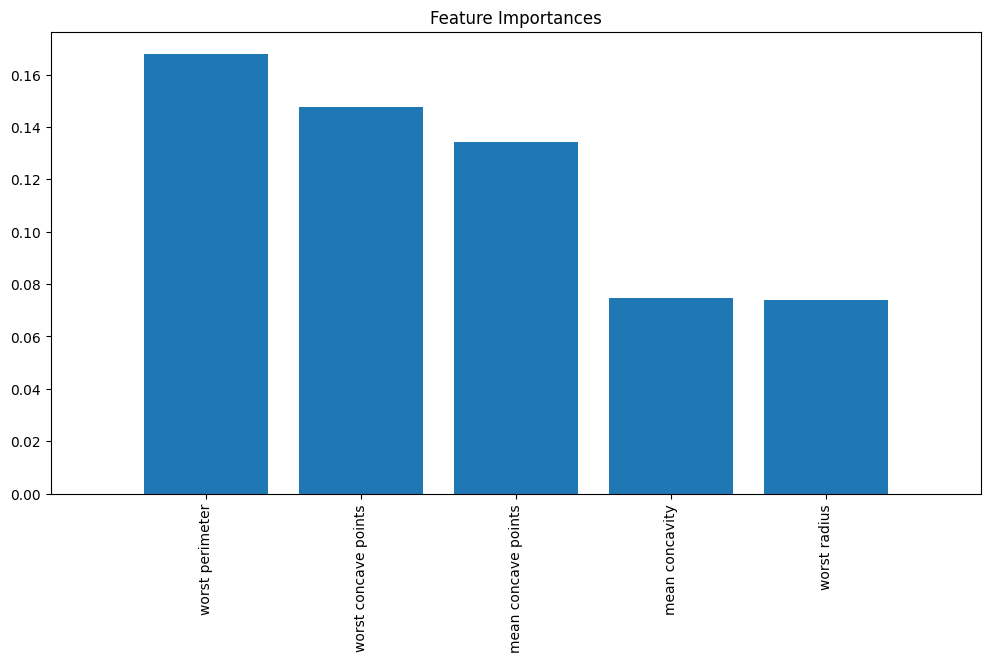

Top 5 most important features: Index(['worst perimeter', 'worst concave points', 'mean concave points',
       'mean concavity', 'worst radius'],
      dtype='object')
Accuracy: 0.9649122807017544
Best model saved successfully.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Now, train your model using only the top features

# Define a function to train the model with hyperparameter tuning
def train_model_with_tuning(X_train, y_train):
    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 200],  # Try different numbers of trees
        'max_depth': [None, 10, 20],      # Try different maximum depths
        'min_samples_split': [2, 5, 10]   # Try different minimum samples split
    }
    
    # Initialize the random forest classifier
    rf_classifier = RandomForestClassifier(random_state=51)
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model from the grid search
    best_rf_classifier = grid_search.best_estimator_
    logging.info("Training Phase Completed")
    
    return best_rf_classifier

def feature_importance(model, X_train, top_n=5):
    # Get feature importances
    importances = model.feature_importances_
    feature_names = X_train.columns
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances if there are enough features
    if X_train.shape[1] >= top_n:
        plt.figure(figsize=(12, 6))
        plt.title("Feature Importances")
        plt.bar(range(top_n), importances[indices][:top_n], align="center")
        plt.xticks(range(top_n), feature_names[indices][:top_n], rotation=90)
        plt.xlim([-1, top_n])
        plt.show()
    
    # Extract the names of the top N most important features
    top_features = feature_names[indices][:top_n]
    
    # Fit scaler on the top features
    scaler = StandardScaler().fit(X_train[top_features])

    # Save the scaler to a pickle file
    with open('scaler.pickle', 'wb') as file:
        pickle.dump(scaler, file)
    logging.info("Scaler saved successfully.")
    
    return top_features

model = train_model_with_tuning(X_train, y_train)
logging.info("Model Training with top features")

# Call the function to visualize feature importances and get the top N features
top_features = feature_importance(model, X_train, top_n=5)
print("Top 5 most important features:", top_features)
X_train_top_features = X_train[top_features]

# Assuming you have test data X_test, select the same features from it
X_test_top_features = X_test[top_features]

# Train the model with hyperparameter tuning
best_model = train_model_with_tuning(X_train_top_features, y_train)

# Make predictions using the best model
predictions = best_model.predict(X_test_top_features)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Save the best model
with open('best_model.pickle', 'wb') as file:
    pickle.dump(best_model, file)
print("Best model saved successfully.")


In [29]:
def evaluate_model(model, X_test, y_test):
    # Evaluate model
    logging.info("Evaluating model...")
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)  # Use predict method instead of predict_proba
    accuracy_before = accuracy_score(y_test, y_pred)
    logging.info(f"Model accuracy: {accuracy_before}")
    return accuracy_before
# Select only the top features from X_test to match X_train_top_features
X_test_top_features = X_test[X_train_top_features.columns]

# Now, evaluate the model using X_test_top_features
evaluate_model(best_model, X_test_top_features, y_test)





0.9649122807017544

In [30]:


# Make predictions using the model trained on top features
predictions = best_model.predict(X_test_top_features)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# def save_model(model):
#     # Save model
#     print("Saving model...")
#     with open('final_model.pickle', 'wb') as file:
#         pickle.dump(final_model_with_top_features, file)
#     print("Model saved successfully.")

# save_model(model)


Accuracy: 0.9649122807017544


In [31]:
# import pickle

# # Load the model from the pickle file
# with open('best_model.pickle', 'rb') as file:
#     rf_classifier = pickle.load(file)
# logging.info("Model Saved")

# # Make predictions using the loaded model
# predictions = rf_classifier.predict(X_test_top_features)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# # Check some diagnostic information
# print("First 10 predictions:", predictions[:10])
# print("True labels of first 10 test samples:", y_test[:10])

# # Print the loaded model
# print(rf_classifier)

# # Print the model's parameters
# print(rf_classifier.get_params()) 


Accuracy: 0.9649122807017544
First 10 predictions: [0. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
True labels of first 10 test samples: 28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
339    0.0
286    1.0
354    1.0
421    1.0
124    1.0
Name: target, dtype: float64
RandomForestClassifier(max_depth=10, random_state=51)
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 51, 'verbose': 0, 'warm_start': False}
